# Credit Card Fraud Detection using SVM Classifier #

1. Credit Card Fraud Detection Dataset Overview

This dataset is tailored for a binary classification task, aiming to predict fraudulent credit card transactions. It contains information of transactions made by European cardholders in September 2013. It includes 284,807 transactions (instances) and 31 features (attributes), including Time, Amount, and 28 anonymized features obtained through PCA transformation, along with the Class label indicating fraud (1) or not fraud (0).

Objective: The goal is to identify fraudulent credit card transactions using the SVM algorithm while handling data imbalance of the data.

Data Management and Ethical Considerations

Privacy Protection

Anonymization: The dataset has been processed with PCA, ensuring that sensitive personal details related to the credit card transactions are anonymized. The original features are transformed into principal components, which are numeric and do not hold any identifiable information about the cardholder.
Compliance with Privacy Regulations: The preprocessing step of PCA transformation aligns with privacy protection measures, making the dataset compliant with data protection regulations like GDPR by ensuring that individuals cannot be directly or indirectly identified.
Intellectual Property Rights

Dataset Licensing: Kaggle, as the platform hosting the dataset, provides terms of use that cover how datasets can be accessed and used. Users are generally allowed to download and use the data for personal and research purposes, adhering to the specified terms, which often encourage academic and educational use while respecting the creators' intellectual property rights.
Contribution and Citation: The dataset has been collected and analyzed through a research collaboration between Worldline and the Machine Learning Group (MLG) of ULB (Université Libre de Bruxelles). Kaggle's platform encourages citing the original creators if the dataset is used for research publications, acknowledging their contribution and effort.

2. Specialties and differences of SVM compared to other ML algorithms

The Support Vector Machine (SVM) algorithm holds a unique place among machine learning algorithms due to several distinctive features and the mathematical framework it employs. Here's what makes SVM particularly special and different from other machine learning algorithms:
1. Maximization of the Margin:
SVM seeks not only to separate the classes but to do so with the maximum margin, which is the distance between the hyperplane (decision boundary) and the nearest data point from either class. This is a fundamental difference from most other classifiers, which do not explicitly consider the margin. The intuition is that a larger margin provides a more robust model with better generalization ability.
2. Support Vectors:
Only a subset of the training data, the so-called support vectors, determine the position of the decision boundary. These are the data points that lie closest to the decision boundary. This makes the SVM model not only compact but also somewhat immune to the influence of data points that are far from the decision boundary, potentially reducing overfitting.
3. Kernel Trick:
SVM can implicitly map input features into high-dimensional feature spaces where the data might be more easily separable, without the need to compute the coordinates in this high-dimensional space explicitly. This kernel trick allows SVM to solve non-linear classification problems using the same framework used for linear classification, making it versatile and powerful.
4. Convex Optimization:
The SVM optimization problem is convex, which means that any local minimum is also a global minimum. This property ensures that the solution found by the SVM algorithm is the best possible solution and is not dependent on the initial parameter settings or random initialization, a challenge often faced by neural network models.

Using SVM in Analysis:
When using SVM for analysis, the following steps and considerations encapsulate its application:
Step 1: Preprocessing
•	Feature Scaling: SVM is sensitive to the scale of the features, so normalization or standardization is crucial.
•	Handling Missing Values: Ensure that the dataset is complete without missing values, as SVM does not inherently handle them.
Step 2: Choosing the Kernel
•	Linear SVM: When the data is linearly separable or when the number of features is large compared to the number of samples.
•	Non-linear SVM: Applying kernels like RBF, Polynomial, or Sigmoid when the data is not linearly separable.
Step 3: Model Training
•	Fit the SVM model to the training data, choosing parameters such as the regularization parameter (C) and the kernel-specific parameters (e.g., gamma in the RBF kernel).
Step 4: Model Evaluation
•	Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and the ROC-AUC curve, especially considering the problem's context and dataset imbalance.
Step 5: Hyperparameter Tuning
•	Use methods like grid search or randomized search to find the optimal model parameters, including the regularization parameter and kernel parameters.

Mathematical Representation and Assumptions:
•	The SVM algorithm works by finding a hyperplane that best divides a dataset into classes. The decision function is f(x)=wx+b, where w is the weight vector, and b is the bias.
•	Assumption: The primary assumption is that the data, when projected into a high-dimensional space, can be separated by a hyperplane. The effectiveness of SVM, especially in non-linear cases, heavily relies on the kernel choice, which implicitly defines the feature space where the separation is attempted.

SVM's distinct approach to maximizing the margin and its ability to handle both linear and non-linear data through kernel functions make it a powerful tool for classification tasks, offering both flexibility and robustness in building predictive models.



3. Kernel, Hyperplane, and Decision Boundary in SVM

Kernel

The kernel in SVM is a function that takes low-dimensional input space and transforms it into a higher-dimensional space. It's a way to make non-linearly separable data linearly separable by increasing the dimensions. Essentially, the kernel trick allows the SVM to find a separating hyperplane in the transformed feature space without explicitly computing the coordinates in this high-dimensional space, which can be computationally expensive. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

Hyperplane

A hyperplane is a flat affine subspace (think of it as a line in 2D, a plane in 3D, and so on) that separates the feature space into two parts. In the context of SVM, the hyperplane is the decision boundary that separates the classes in the feature space. The SVM algorithm tries to find the optimal hyperplane that maximizes the margin between classes.

Decision Boundary

The decision boundary is the surface implied by the hyperplane in the feature space that separates different classes. In simple terms, it's the "line" or "plane" that divides the space such that points on one side of it are classified into one class, and points on the other side are classified into another class. The decision boundary determined by the SVM hyperplane is optimal in the sense that it maximizes the margin between classes.

4. Maximum Margin, Support Vectors, and Maximum Margin Hyperplane in SVM
Maximum Margin

The maximum margin is the width that the boundary could be increased by before hitting a data point. It represents the largest distance between the nearest data point of any class and the hyperplane, ensuring that the classes are as separated as possible. The intuition behind maximizing the margin is that a larger margin between the classes will help the model generalize better to unseen data, reducing overfitting.

Support Vectors

Support vectors are the data points that are closest to the hyperplane and directly influence its position and orientation. These points lie on the edge of the margin, on either side of the hyperplane. In SVM, only the support vectors are relevant in defining the hyperplane and the decision boundary, meaning that removing any other points or adding more points far from the margin will not affect the model's predictions. This property makes SVM models relatively efficient and robust.

Maximum Margin Hyperplane

The maximum margin hyperplane is the hyperplane that lies halfway between the support vectors of the two classes and maximizes the margin between those classes. It is the optimal decision boundary found by the SVM that minimizes classification errors while maximizing the separation (margin) between classes. The maximum margin hyperplane is determined by the support vectors, which, as mentioned, are the data points that are nearest to the decision boundary.

In summary, these concepts play a central role in the SVM's ability to classify data points. The kernel allows handling non-linear data, the hyperplane (and its associated decision boundary) separates the classes, and the maximum margin principle ensures that the separation is as clear and robust as possible, with support vectors being the critical elements that define this separation.

In [2]:
# 5. import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is stored as 'creditcard.csv'
df = pd.read_csv('/Users/rameshchidurala/Documents/DSC-540 Assignments/creditcard.csv')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


6. Data Exploration (identifying nan values, feature scaling, Handling imbalance of the data)

In [6]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Class distribution
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


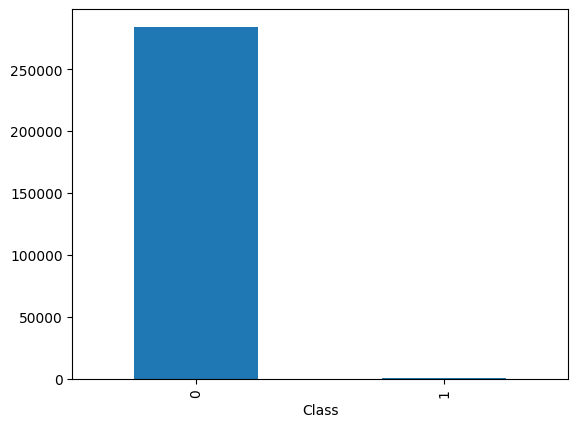

In [8]:
df["Class"].value_counts().plot(kind = "bar")
plt.show()

From above visualization we can see the high imbalance of the data in target class.

Handling Data Imbalance
The dataset is highly imbalanced, with a very small proportion of fraudulent transactions. This imbalance can lead to a model that overwhelmingly predicts the majority class (non-fraudulent transactions), resulting in poor performance in detecting fraud, which is the more critical objective.

To address this, several techniques can be used:

Under-sampling: Reducing the number of examples from the majority class to match the minority class, as demonstrated in the preprocessing step. This can improve balance but at the cost of losing information.

Over-sampling: Increasing the number of examples in the minority class by replicating them or using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples. This approach helps in balancing the classes without losing information but can increase the risk of overfitting to the minority class.

Adjusting Class Weights: Another approach is to use the class_weight parameter in models like SVC from scikit-learn. This method gives higher importance to the minority class during training, helping the model to pay more attention to correctly classifying instances of the minority class.

In [9]:
# Scale 'Time' and 'Amount'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

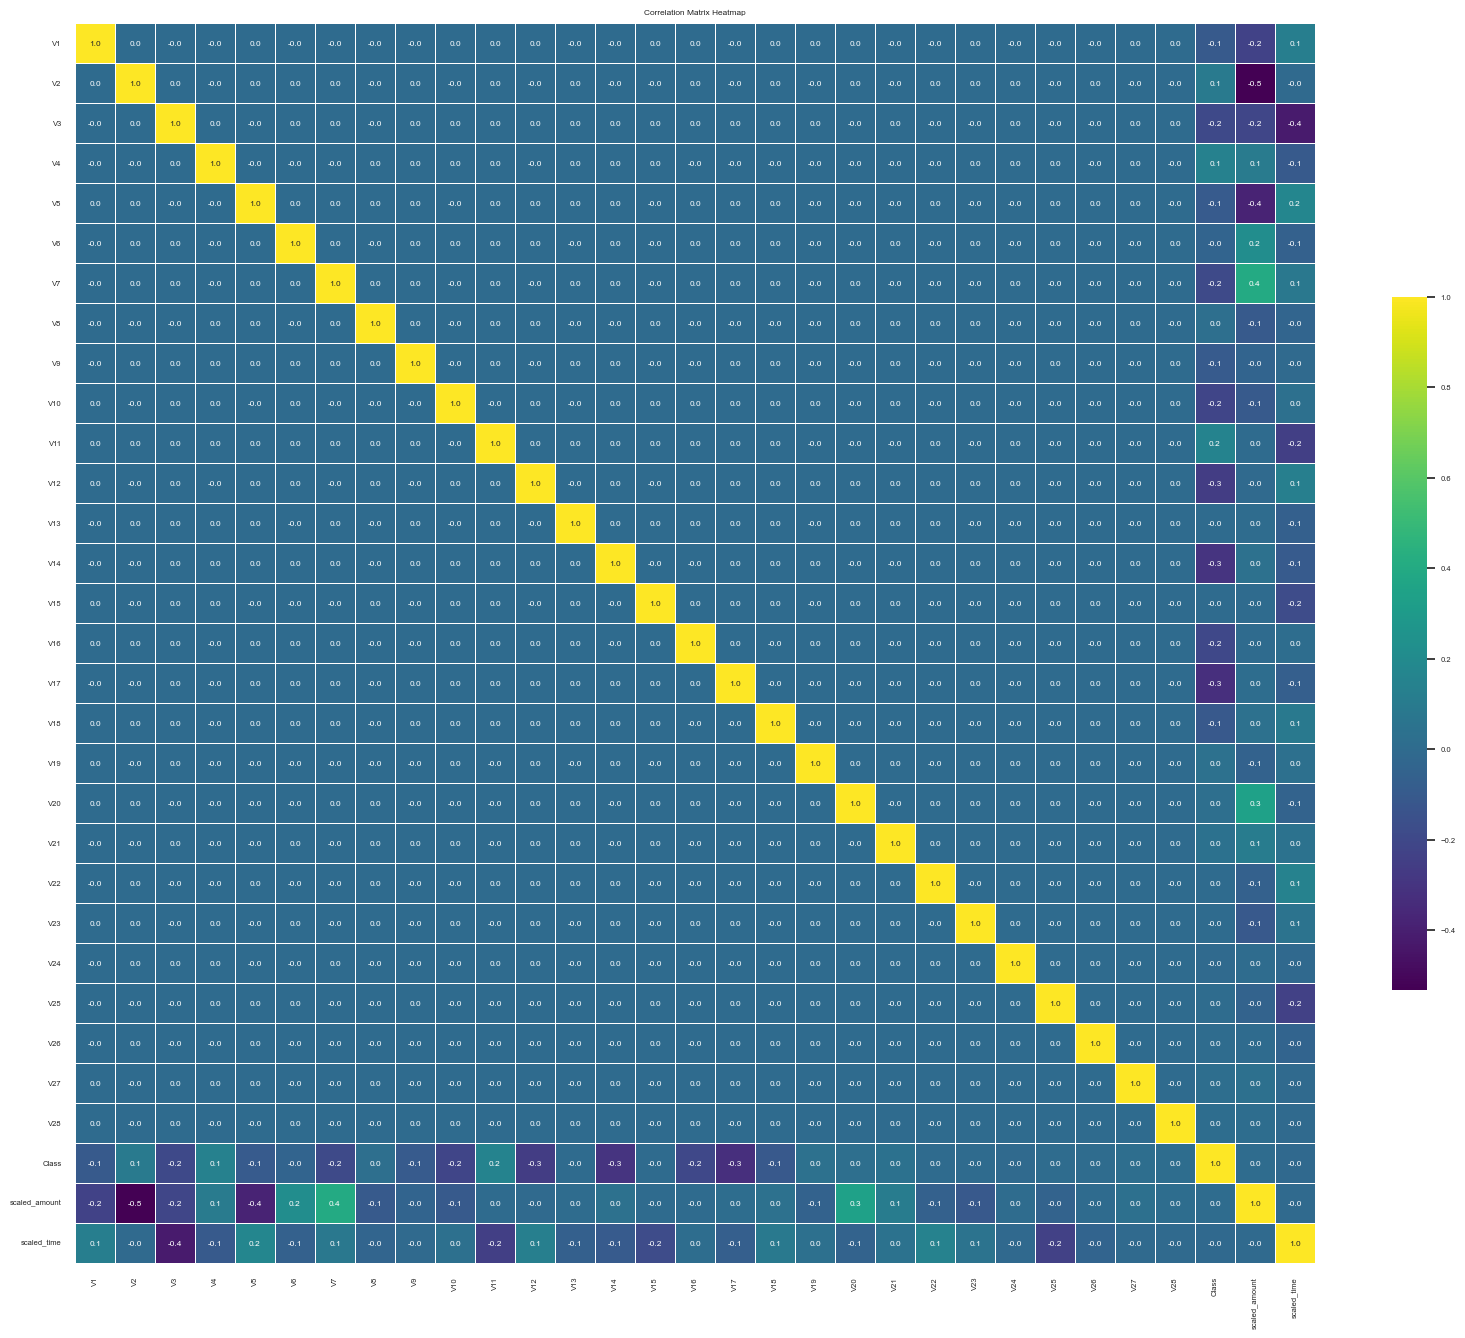

In [10]:
# Correlation matrix
corr_matrix = df.corr()

# Increase figure size
plt.figure(figsize=(20, 18))

# Rotate labels and set font size
sns.set(font_scale=0.5)
ax = sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='viridis', square=True,
                 linewidths=.5, cbar_kws={"shrink": .5})

# Rotate x and y axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()


## Data Imbalancing Techniques ##
Many machine learning algorithms offer the "class_weight" parameter to adjust the cost of errors in different classes, which can mitigate imbalance.
However, today we will discuss oversampling and undersampling methods, which often yield more effective results."

1. Oversampling and Techniques:
Oversampling offers a technique for rebalancing classes prior to initiating model training. By duplicating minority class data points, oversampling equalizes the distribution and prevents algorithms from neglecting important yet infrequent classes.

Random Oversampling: "Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. Oversampling can be done more than once (2x, 3x, 5x, 10x, etc.) This is one of the earliest proposed methods, that is also proven to be robust."

SMOTE(Synthetic Minority Oversampling Technique): "SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space."

Borderline-SMOTE: "Borderline-SMOTE is a variation of the SMOTE (Synthetic Minority Over-sampling Technique) method, which creates synthetic examples among minority class samples but targets only specific borderline regions. This method limits the creation of synthetic examples by considering regions where most minority class examples are located. Borderline-SMOTE identifies regions where some minority class examples are close to the border and generates synthetic examples in these regions. This focuses on areas where the minority class requires more examples, helping to reduce the imbalance in the dataset. This technique can reduce the risk of overfitting as it focuses on creating synthetic versions of only those examples close to the borderline, rather than replicating all samples in the region."

SVM-SMOTE: "SVM SMOTE is a type of SMOTE (Synthetic Minority Over-sampling Technique) algorithm used to increase the number of samples in the minority class. However, unlike standard SMOTE, SVM (Support Vector Machine) classifier is used to generate synthetic examples. SVM SMOTE focuses on generating synthetic examples close to the classification decision boundary while increasing the number of minority class samples. Therefore, synthetic examples are strategically placed near the classification decision boundary. This is designed to improve classification performance and enhance learning of the minority class."

SMOTE-ENN: "This method combines the SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class."

ADASYN (Adaptive Synthetic Sampling): "ADASYN takes a more adaptive approach. It focuses on the minority instances that are difficult to classify correctly, rather than oversampling all minority instances uniformly. It assigns a different weight to each minority instance based on its level of difficulty in classification."

2. Undersampling and Techniques:
Undersampling provides a method to rebalance classes before model training commences. By reducing the number of majority class data points, undersampling equalizes the distribution and prevents algorithms from being biased towards the majority class, thereby ensuring that important yet infrequent classes are not overlooked.

Random Undersampling
Description: Randomly eliminates instances from the majority class to match the minority class's size.
Best For: Quick and dirty baseline models where computational efficiency is a priority, and the dataset is sufficiently large that losing some majority class data is acceptable.
Consideration: There's a significant risk of losing important information, which could be detrimental in fraud detection where nuances in the data could indicate fraudulent behavior.

Cluster Centroids
Description: This method performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in an effort to preserve information.
Best For: Datasets where preserving the information content of the majority class can be achieved by understanding its cluster structures.
Consideration: It can be more computationally intensive than random undersampling but less likely to lose crucial information.

NearMiss
Versions: There are three versions of NearMiss algorithms:
NearMiss-1: Selects examples from the majority class closest to the minority class average.
NearMiss-2: Selects examples from the majority class farthest from the minority class average.
NearMiss-3: A more sophisticated approach that, for every minority class sample, keeps the N closest majority class samples.
Best For: Situations where you aim to keep majority samples that are closest to the minority samples, thereby focusing on the regions of overlap between classes.
Consideration: Can be effective but might lead to models biased towards the border cases, potentially ignoring broader trends within the legitimate transactions.

Condensed Nearest Neighbor(CNN): "The basic idea is to select a subset of examples from the original dataset, ensuring that these examples represent all classes adequately. CNN starts with a list of examples and then compares each example with the others. If an example belongs to the same class as a misclassified example, it is retained, and the process continues with the next example. This process continues to create a smaller subset of the dataset. As a result, CNN retains examples that adequately represent all classes while reducing the size of the dataset. This is particularly useful for addressing class imbalance issues, especially in large datasets."

Edited Nearest Neighbors(ENN): "The ENN algorithm starts by applying the k-nearest neighbors (KNN) algorithm to the dataset. It then examines each example in the dataset and compares its class label to the class labels of its k-nearest neighbors. If an example's class label does not match the majority class label among its k-nearest neighbors, it is considered misclassified and removed from the dataset. This process iterates until no further examples are removed. The goal of ENN is to eliminate noisy and borderline examples from the majority class, thereby improving the balance between the classes and the overall performance of the model."

### Oversampling Techniques ###

In [11]:
'''

# Random Over Sampler

from imblearn.over_sampling import RandomOverSampler

print("Before oversampling: ",Counter(y_train))
RandomOverSampler = RandomOverSampler(random_state=42)
X_train,y_train= RandomOverSampler.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))


# Smote (Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE

print("Before oversampling: ",Counter(y_train))
SMOTE = SMOTE(random_state=42)
X_train,y_train= SMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

# Border-line Smote

from imblearn.over_sampling import BorderlineSMOTE

print("Before oversampling: ",Counter(y_train))
BorderlineSMOTE = BorderlineSMOTE(random_state=42)
X_train,y_train= BorderlineSMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))


# SVM Smote

from imblearn.over_sampling import SVMSMOTE

print("Before oversampling: ",Counter(y_train))
SVMSMOTE = SVMSMOTE(random_state=42)
X_train,y_train= SVMSMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))


# Smoteenn

from imblearn.combine import SMOTEENN

print("Before oversampling: ",Counter(y_train))
SMOTEENN = SMOTEENN(random_state=42)
X_train,y_train= SMOTEENN.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

# Adasyn

from imblearn.over_sampling import ADASYN

print("Before oversampling: ",Counter(y_train))
ADASYN = ADASYN(random_state=42)
X_train,y_train= ADASYN.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

'''

'\n\n# Random Over Sampler\n\nfrom imblearn.over_sampling import RandomOverSampler\n\nprint("Before oversampling: ",Counter(y_train))\nRandomOverSampler = RandomOverSampler(random_state=42)\nX_train,y_train= RandomOverSampler.fit_resample(X_train,y_train)\nprint("After oversampling: ",Counter(y_train))\n\n\n# Smote (Synthetic Minority Oversampling Technique)\n\nfrom imblearn.over_sampling import SMOTE\n\nprint("Before oversampling: ",Counter(y_train))\nSMOTE = SMOTE(random_state=42)\nX_train,y_train= SMOTE.fit_resample(X_train,y_train)\nprint("After oversampling: ",Counter(y_train))\n\n# Border-line Smote\n\nfrom imblearn.over_sampling import BorderlineSMOTE\n\nprint("Before oversampling: ",Counter(y_train))\nBorderlineSMOTE = BorderlineSMOTE(random_state=42)\nX_train,y_train= BorderlineSMOTE.fit_resample(X_train,y_train)\nprint("After oversampling: ",Counter(y_train))\n\n\n# SVM Smote\n\nfrom imblearn.over_sampling import SVMSMOTE\n\nprint("Before oversampling: ",Counter(y_train))\nSV

 ### Undersampling Techniques ###

In [12]:
'''

# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

print("Before undersampling: ",Counter(y_train))
RandomUnderSampler = RandomUnderSampler(random_state=42)
X_train,y_train= RandomUnderSampler.fit_resample(X_train,y_train)
print("After undersampling: ",Counter(y_train))


# NearMiss

from imblearn.under_sampling import NearMiss

print("Before undersampling: ",Counter(y_train))
NearMiss = NearMiss() # NearMiss has versions
X_train,y_train= NearMiss.fit_resample(X_train,y_train)
print("After undersampling: ",Counter(y_train))


# Condensed Nearest Neighbor(CNN)

from imblearn.under_sampling import CondensedNearestNeighbour

print("Before undersampling: ",Counter(y_train))
CNN = CondensedNearestNeighbour(random_state=42)
X_train,y_train = CNN.fit_resample(X_train,y_train)
print("After undersampling: ",Counter(y_train))


# Edited Nearest Neighbors(ENN)

from imblearn.under_sampling import EditedNearestNeighbours

print("Before undersampling: ",Counter(y_train))
ENN = EditedNearestNeighbours(random_state=42)
X_train,y_train = ENN.fit_resample(X_train,y_train)
print("After undersampling: ",Counter(y_train))


# Tomek Links

from imblearn.under_sampling import TomekLinks

print("Before undersampling: ",Counter(y_train))
TomekLinks = TomekLinks(random_state=42)
X_train,y_train = TomekLinks.fit_resample(X_train,y_train)
print("After undersampling: ",Counter(y_train))


'''

'\n\n# Random Undersampling\n\nfrom imblearn.under_sampling import RandomUnderSampler\n\nprint("Before undersampling: ",Counter(y_train))\nRandomUnderSampler = RandomUnderSampler(random_state=42)\nX_train,y_train= RandomUnderSampler.fit_resample(X_train,y_train)\nprint("After undersampling: ",Counter(y_train))\n\n\n# NearMiss\n\nfrom imblearn.under_sampling import NearMiss\n\nprint("Before undersampling: ",Counter(y_train))\nNearMiss = NearMiss() # NearMiss has versions\nX_train,y_train= NearMiss.fit_resample(X_train,y_train)\nprint("After undersampling: ",Counter(y_train))\n\n\n# Condensed Nearest Neighbor(CNN)\n\nfrom imblearn.under_sampling import CondensedNearestNeighbour\n\nprint("Before undersampling: ",Counter(y_train))\nCNN = CondensedNearestNeighbour(random_state=42)\nX_train,y_train = CNN.fit_resample(X_train,y_train)\nprint("After undersampling: ",Counter(y_train))\n\n\n# Edited Nearest Neighbors(ENN)\n\nfrom imblearn.under_sampling import EditedNearestNeighbours\n\nprint("B

7. Formulating Questions

1.Can We Accurately Identify Fraudulent Transactions Based on Anonymized Features?
Context: The dataset includes transactions made by credit cards with anonymized features obtained through PCA transformation, along with the 'Time' and 'Amount' of each transaction. Identifying transactions that are fraudulent (class 1) versus those that are legitimate (class 0) can significantly aid in minimizing financial losses and improving customer trust.

2.How Effective Is the SVM Model in Detecting Fraudulent Transactions Across Different Transaction Amounts?
Context: Fraudulent transactions might not follow a uniform pattern, especially in terms of transaction amounts. Some frauds might involve small amounts to evade detection, while others might be large, high-value transactions. Understanding the effectiveness of fraud detection across different transaction amounts could help in fine-tuning detection mechanisms.


First I decided to Implement SVM-SMOTE for handling imbalance of the data which is oversampling technique, but The data is huge 284807 observations oversampling makes double the amount of data it nedds lot of computational power.
So I decided to use undersampling technique Cluster centroids to address the imbalance of the data.

Choosing the Best Technique for the Credit Card Fraud Detection Dataset

Given the critical nature of fraud detection, where each fraudulent transaction potentially carries a high cost, the goal is to minimize information loss while addressing class imbalance. Cluster Centroids might offer a good balance between maintaining the majority class's integrity and reducing its size. It allows for a more nuanced undersampling that respects the underlying data distribution.

8. Splitting the data using linear kernel of SVM Classifier

In [13]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter


# Preparing the dataset
X = df.drop(['Class'], axis=1)
y = df['Class']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Before undersampling: ", Counter(y_train))

# Applying Cluster Centroids for undersampling
cc = ClusterCentroids(random_state=42)
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_resampled))


Before undersampling:  Counter({0: 227451, 1: 394})


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


After undersampling:  Counter({0: 394, 1: 394})


In [14]:
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

9. Fitting the SVM model

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Training the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_resampled, y_train_resampled)


SVC(kernel='linear')

In [16]:
# 11. Making predictions
y_pred = svm_classifier.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 0])

In [17]:
y_train[:5]

223361    0
165061    0
238186    0
150562    0
138452    0
Name: Class, dtype: int64

In [18]:
svm_classifier.score(X_train_resampled, y_train_resampled)

0.9403553299492385

In [19]:
svm_classifier.score(X_test, y_test)

0.9742810996804887

13. Cross Validation

In [20]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[55407  1457]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy Score: 0.9742810996804887
ROC-AUC Score: 0.9463724044767033


Confusion Matrix Analysis
True Positives (TP = 90): The model correctly predicted 90 fraudulent transactions.
True Negatives (TN = 55407): The model correctly identified 55,407 legitimate transactions.
False Positives (FP = 1457): The model incorrectly labeled 1,457 legitimate transactions as fraudulent. This represents a Type I error.
False Negatives (FN = 8): The model missed 8 fraudulent transactions, marking them as legitimate. This represents a Type II error.

Classification Report Insights
Precision for Class 1 (0.06): Out of all transactions predicted as fraud, only 6% were actually fraud. This low precision indicates a high number of false positives for fraud detection.
Recall for Class 1 (0.92): The model successfully identified 92% of all actual fraudulent transactions. This high recall rate is crucial for fraud detection systems, indicating the model's effectiveness in catching fraud.
F1-Score for Class 1 (0.11): The F1-score is a harmonic mean of precision and recall. A score of 0.11 for fraud detection, although low, reflects the trade-off between precision and recall. Given the context of fraud detection, a higher emphasis is placed on recall.
Accuracy Score
The overall accuracy of 97.4% indicates that a large portion of the predictions made by the model are correct. However, given the imbalance in the dataset, accuracy is not the most reliable metric.

ROC-AUC Score
An ROC-AUC score of 0.946 is impressive and suggests that the model has a strong ability to distinguish between fraudulent and non-fraudulent transactions. It indicates good model performance across various threshold settings.
Interpretation in the Context of Fraud Detection
The high recall for fraudulent transactions is particularly important in the context of fraud detection. It implies that the model is capable of identifying the majority of actual fraud cases, which is critical for minimizing financial losses.
The low precision for fraudulent transactions, however, indicates that while the model is good at catching fraud, it does so at the expense of falsely labeling many legitimate transactions as fraudulent. This could potentially lead to customer dissatisfaction due to false alarms.
The high number of false positives could be a concern for practical applications, requiring manual review of flagged transactions, which could be resource-intensive.

Further analysis for Improvement
Feature Engineering: More informative features, possibly engineered from the existing ones, could help improve model precision without significantly sacrificing recall.
Model Tuning: Adjusting the decision threshold of the SVM model or tuning other hyperparameters might help balance precision and recall more effectively.
Alternative Models: Experimenting with different models or ensemble methods could yield better performance. For instance, ensemble methods like Random Forest or Gradient Boosting might improve precision while maintaining high recall.
Cost-sensitive Learning: Incorporating the cost of misclassifications (e.g., the financial loss associated with fraud versus the operational cost of false positives) directly into the model training process could help optimize for the most economically viable outcome.


12. Interpreting the results in the context of the questions asked.

1.Can We Accurately Identify Fraudulent Transactions Based on Anonymized Features?
Analysis:

High Recall for Fraudulent Transactions: The recall for class 1 (fraudulent transactions) is 0.92, indicating that the SVM model is highly effective in identifying fraudulent transactions. This high recall suggests that the model successfully captures the patterns and anomalies associated with fraud, even with anonymized features.
Low Precision for Fraudulent Transactions: The precision for class 1 is notably low at 0.06, implying that while the model is adept at catching fraud, it also misclassifies a significant number of legitimate transactions as fraudulent. This could lead to operational inefficiencies, as each flagged transaction might require manual review.
Overall Accuracy: The model achieves an overall accuracy of 97.4%, which is impressive. However, given the class imbalance, accuracy is not the most informative metric. The high number of false positives (1457 out of 56962) affects the precision and indicates that accuracy alone might overestimate the model's performance in practical scenarios.

Conclusion:
The SVM model demonstrates strong potential in identifying fraudulent transactions based on anonymized features. The high recall rate is particularly valuable in fraud detection contexts, where missing a fraudulent transaction can have significant repercussions. However, the low precision underscores the need for further model tuning or exploring additional features that might reduce false positives without substantially affecting recall.

2.How Effective Is the SVM Model in Detecting Fraudulent Transactions Across Different Transaction Amounts?
Analysis:

The provided metrics don't directly answer this question since they aggregate performance across all transactions. However, the model's ability to detect fraud with high recall (0.92) suggests it can effectively identify fraud across the dataset.
The low precision and the notable number of false positives might indicate variability in the model's effectiveness across different transaction amounts. Transactions of varying amounts may exhibit different patterns of fraudulent behavior, and the model's current configuration might not optimally capture these nuances, leading to a high false-positive rate.

Conclusion:
While the current evaluation suggests that the SVM model is generally effective in detecting fraudulent transactions, assessing its performance across different transaction amounts requires a more segmented approach. The high recall indicates that the model has a good baseline for detecting fraud, but the precision and false-positive rate suggest there's room for improvement, particularly for tailoring the model to effectively handle the variability associated with transaction amounts.

## Reason behind using decision score instead of probability ##
When working with Support Vector Machines (SVM) in scikit-learn, the decision function is used instead of predicted probabilities for certain evaluations like ROC and Precision-Recall curves because the standard SVM algorithm does not naturally provide probability estimates. Instead, SVMs make their predictions based on the distance of the data points from the decision boundary (hyperplane).Here are the reasons why decision scores are used:

1. Nature of SVM Output:
The SVM model outputs a decision score that represents the distance between the test instance and the decision boundary. A positive score indicates one class, and a negative score indicates the other.

2. Probabilities Require Calibration:
To convert decision scores into probabilities, an additional step called calibration (e.g., Platt scaling or isotonic regression) is required. This involves fitting a separate model (like logistic regression) to the decision scores to map them to probabilities, which can be computationally expensive and might not improve the model's performance.

3. Direct Relation with Classification Decision:
The decision function provides a direct way to evaluate how definitive the classification decision is. Larger absolute values of the decision score indicate a more confident classification, which can be a more straightforward measure of the model's certainty than the calibrated probabilities.

4. Evaluation Metrics:
Many evaluation metrics, like the ROC curve, only need scores that can rank instances correctly rather than true probabilities. Since the decision function preserves the ranking order of the data points, it's sufficient for such evaluations.

5. Efficiency:
Using the decision function avoids the extra step of converting decision scores into probabilities, making it more efficient, especially when the probabilities are not explicitly required for further analysis or decision-making processes.

6. Non-probabilistic Nature of SVM:
Traditional SVM is not probabilistic in nature. It's designed to classify instances by finding the best separating hyperplane. The distance from the hyperplane (decision score) naturally fits into this framework, whereas probabilities do not.



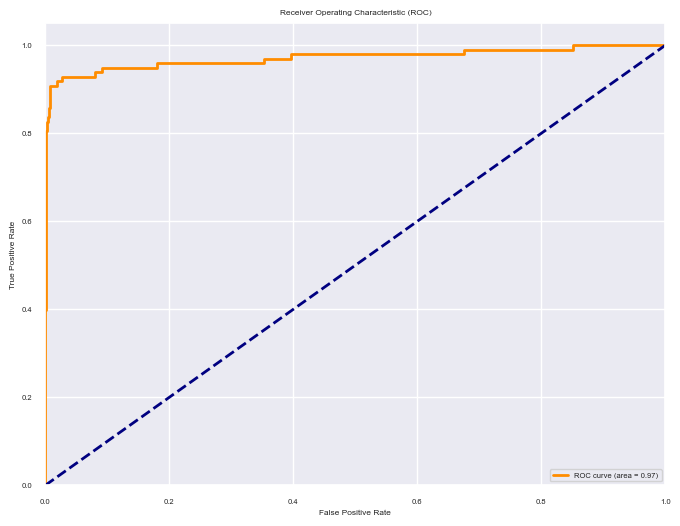

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
# For binary classification, SVC with `probability=False` does not provide a `.predict_proba()` method by default
# So, we use `decision_function` to generate the ROC curve, which is also valid
y_scores = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

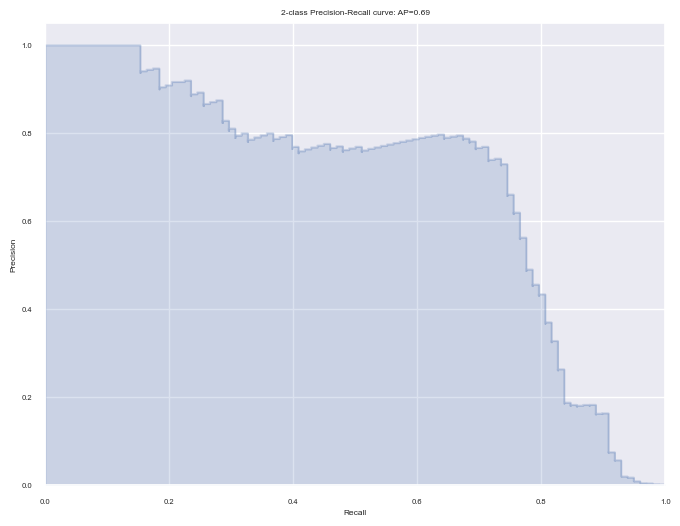

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Precision-Recall curve')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

Interpretation of the PR Curve:
Average Precision (AP) Score of 0.69: The AP score summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. An AP of 0.69 indicates that the classifier has a reasonably good measure of separability, showing a good balance between precision and recall throughout the range of possible thresholds.
Curve Shape and Model Performance: Initially, we see high precision, which indicates that when the model declares transactions as fraudulent, it is correct most of the time. However, as recall increases (i.e., as the model tries to catch more of the actual fraud), precision starts to decline, showing the trade-off between catching more fraud and making more false alarms.
High Recall Region: The model starts with a high recall with only a slight drop in precision, which is desirable in a fraud detection context where failing to detect fraud can be costly.
Decline in Precision: As the recall approaches 1, there is a steep drop in precision. This suggests that in trying to capture all fraudulent transactions, the model starts to flag many legitimate transactions as fraudulent, leading to a high false positive rate.

In [23]:
# Cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("\n5-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2)), cv_scores


5-fold Cross Validation Accuracy: 0.93 (+/- 0.04)


(None, array([0.93037975, 0.89240506, 0.93037975, 0.93630573, 0.94267516]))

Cross-Validation Accuracy: 0.93 (+/- 0.04)

Mean Accuracy (0.93): The average accuracy across the 5 folds is 93%, which is quite high. This indicates that, on average, the model correctly predicts whether a transaction is fraudulent or legitimate 93% of the time across different subsets of the data. This level of accuracy suggests that the SVM model is effective at distinguishing between the two classes for the majority of the dataset.

Standard Deviation (0.04): The standard deviation of the accuracy scores across the folds is 0.04 (or 4%). This measure indicates the variability of the model's accuracy from one fold to another. A lower standard deviation would suggest that the model's performance is consistent across different subsets of the data. In this case, a 4% deviation is relatively low, implying that your model's performance is fairly stable and not highly sensitive to the specific data points included in each fold of the cross-validation process.

Individual Fold Scores: The accuracy scores for the individual folds are [0.9304, 0.8924, 0.9304, 0.9363, 0.9427]. The variation among these scores (from a low of 89.24% to a high of 94.27%) provides further insight into the model's consistency. While there is some fluctuation, all scores are relatively high, confirming the model's robustness. The variation might be due to the distribution of fraud and legitimate transactions in each fold, especially considering the class imbalance inherent in fraud detection datasets.


In [24]:
# Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model and parameter grid as before
param_grid = {
    'C': [0.1, 1, 10, 100],  # Adjust as necessary
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # For RBF kernel
    'kernel': ['rbf','poly', 'sigmoid']  # Adjust based on kernels 
}

svm = SVC(probability=False)  # probability=False is default, mentioned for clarity

grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5, scoring='average_precision')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

Optimal Hyperparameters:
C=100 and gamma=0.0001 were identified as the best parameters.
A C value of 100 suggests that the model benefits from a higher penalty on misclassified data points, which helps in achieving a better classification by allowing the decision boundary to be more flexible to correctly classify as many training samples as possible.
A gamma value of 0.0001 indicates that the model performs better when the influence of each individual support vector is more localized, preventing overfitting by not trying to overly bend the decision boundary to accommodate the training data.
Best Score: The best average precision score across the cross-validation folds was 0.979, indicating a high ability of the chosen model to retrieve relevant instances. This score is particularly meaningful in imbalanced datasets like fraud detection, where precision (the model's ability to return more relevant results) is crucial.

### Fitting model with Gridsearch Best parameters ###

In [25]:
from sklearn.svm import SVC

# Initialize the SVM model with the best parameters found
optimal_svm = SVC(C=100, gamma=0.0001, kernel='rbf')

# Fit the model on your training data
optimal_svm.fit(X_train_resampled, y_train_resampled)

# Now you can proceed to make predictions with the optimized model, evaluate it, or save it for future use.


SVC(C=100, gamma=0.0001)

In [31]:
# 11. Making predictions
y_pred1 = optimal_svm.predict(X_test)
y_pred1[:5]

array([1, 0, 0, 0, 0])

In [27]:
y_test[:5]

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

In [28]:
optimal_svm.score(X_train_resampled, y_train_resampled)

0.9390862944162437

In [30]:
optimal_svm.score(X_test, y_test)

0.9866753274112566

In [32]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred1))

Confusion Matrix:
[[56115   749]
 [   10    88]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.90      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Accuracy Score: 0.9866753274112566
ROC-AUC Score: 0.9423937026977364


As we can see few results in classification report are improved with best parameters such as F1-score and precision of class 1 etc.

14. Mathematical Formulas

1.SVM Optimization Problem:
o	Primal Form: min⁡w,b,ξ12∣∣w∣∣2+C∑i=1nξi
o	Subject to: yi(w⋅xi+b)≥1−ξi,ξi≥0 Here, w is the weight vector, b is the bias, C is the penalty parameter, yi are the labels, xi are the feature vectors, and ξi are the slack variables allowing for misclassification.
2.Dual Form:
o	Maximize: ∑i=1nαi−12∑i,j=1nyiyjαiαj⟨xi,xj⟩
o	Subject to: ∑i=1nyiαi=0 and 0≤αi≤C Here, αi are the Lagrange multipliers.
3.Decision Function:
o	f(x)=sgn(∑i=1nyiαi⟨x,xi⟩+b)The decision function uses the sign of the linear combination of the support vectors weighted by the Lagrange multipliers, dot product with the input vector, plus the bias.
4.Kernel Trick:
o	K(xi,xj)=ϕ(xi)⋅ϕ(xj)The kernel function implicitly computes the dot product of vectors in a high-dimensional feature space without explicitly performing the transformation ϕ.
5.Precision, Recall, and F1-Score:
o	Precision: P=TP/TP+FP
o	Recall: R=TP/TP+FN
o	F1-Score: F1=2⋅P⋅R/P+R Here, TP, FP, and FN represent true positives, false positives, and false negatives, respectively.

Graphs

ROC Curve: The ROC (Receiver Operating Characteristic) curve graphically displays the trade-off between the true positive rate and false positive rate for every possible classification threshold. The AUC (Area Under the Curve) represents the model's ability to discriminate between positive and negative classes.
Precision-Recall Curve: This curve shows the trade-off between precision and recall for different thresholds. It is particularly useful for imbalanced datasets.
Count Plot (Class Distribution): The bar plot displays the distribution of the two classes. This kind of visualization highlights the class imbalance, with one bar for non-fraudulent (class 0) and another for fraudulent (class 1) transactions.
Correlation Matrix: Heat map is used for correlation analysis.


Recording Link: https://vimeo.com/976873558/c177989216?share=copy

Kaggle. (2018). Credit Card Fraud Detection [Data set]. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data